<a href='https://colab.research.google.com/github/fernandovieira1/FinScore/blob/main/FINSCORE.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

**# INTRU√á√ïES**

* Antes de iniciar, certifique-se de estar logado na sua conta Google.

* Um bot√£o azul 'Fazer login', localizado no canto superior direito da tela, aparecer√°, se n√£o.

* Feito isto, basta inserir os dados nas se√ß√µes abaixo descritas:
    - 1.1 Cliente
    - 1.2 Per√≠odo
    - 1.3 Score Serasa
    - 1.4 Lan√ßamento dos dados Cont√°beis (na planilha indicada no link)

* Cada uma das se√ß√µes mencionadas possui anota√ß√µes sobre como proceder.

* Logo ap√≥s, clique no menu 'Ambiente de execu√ß√£o' e em 'Executar tudo' (ou CTR + F9), nesta ordem.

##### 1. LAN√áAMENTO DOS DADOS #####

##### 1.1 Cliente

*--> Insira o nome do cliente/empresa*

In [1]:
# Cliente
cliente = 'CARGOBR TRANSPORTES'

##### 1.2 Per√≠odo

*--> Insira os anos inicial (a primeira) e final (da √∫ltima) das demonstra√ß√µes cont√°beis que serviram de base para a an√°lise*

In [2]:
# Ano Inicial
ano_inicial = 2021

In [3]:
# Ano Final
ano_final = 2023

##### 1.3 Score Serasa

*--> Insira o score Serasa do cliente*

In [4]:
# Serasa
serasa = 550

##### 1.4 Lan√ßamento dos dados Cont√°beis

*--> Acesse a planilha abaixo (CTRL + click) e insira as informa√ß√µes nas linhas e colunas respectivas*

In [5]:
# Lance do ano mais recente para o mais antigo
'https://docs.google.com/spreadsheets/d/1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33/edit?gid=1575975872#gid=1575975872'

'https://docs.google.com/spreadsheets/d/1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33/edit?gid=1575975872#gid=1575975872'

*--> Agora basta clicar no menu 'Ambiente de execu√ß√£o' e em 'Executar tudo' (ou CTR + F9), nesta ordem.*

##### CONFIGURA√á√ÉO DO AMBIENTE

##### Configura√ß√£o do ambiente

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import subprocess
import importlib.util


In [7]:
%%capture
# Lista de pacotes necess√°rios
required_packages = ['gspread', 'pandas', 'gspread_dataframe', 'openpyxl']

# Verificar e instalar pacotes que n√£o est√£o instalados
def install_missing_packages(packages):
    for package in packages:
        if importlib.util.find_spec(package) is None:
            print(f'‚ö† Instalando {package}...')
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', package])
        else:
            print(f'‚úî {package} j√° est√° instalado')

install_missing_packages(required_packages)

In [8]:
# Definir o ID da planilha e da aba (worksheet)
sheet_id = '1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33'
gid = '1575975872'  # ID da aba espec√≠fica

# Construir a URL para baixar a planilha como um arquivo Excel (.xlsx)
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx&id={sheet_id}&gid={gid}'

# Ler a planilha diretamente no Pandas
df_dados_contabeis = pd.read_excel(url, engine='openpyxl')

In [9]:
# Fun√ß√£o para calcular os √≠ndices cont√°beis
def calcular_indices_contabeis(df):
    indices = {}

    indices['Liquidez Corrente'] = df['Ativo Circulante'] / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Passivo Circulante: BP
    # => A liquidez corrente mede a capacidade da empresa de pagar suas obriga√ß√µes de curto prazo.

    indices['Liquidez Seca'] = (df['Ativo Circulante'] - df['Estoques']) / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Estoque: BP
    # Passivo Circulante: BP
    # => A liquidez seca √© uma medida de liquidez que desconsidera o estoque da empresa.

    indices['Margem L√≠quida'] = df['Lucro L√≠quido'] / df['Receita Total']
    # Lucro L√≠quido: DRE
    # Receita Total: DRE
    # => A margem l√≠quida mede a porcentagem de lucro l√≠quido que a empresa gera para cada real de receita.

    indices['ROA'] = df['Lucro L√≠quido'] / df['Ativo Total']
    # Lucro L√≠quido: DRE
    # Ativo Total: BP
    # => O retorno sobre ativos (ROA) mede a efici√™ncia da empresa em gerar lucro a partir de seus ativos.

    indices['ROE'] = df['Lucro L√≠quido'] / df['Patrim√¥nio L√≠quido']
    # Lucro L√≠quido: DRE
    # Patrim√¥nio L√≠quido: BP
    # => O retorno sobre o patrim√¥nio l√≠quido (ROE) mede a efici√™ncia da empresa em gerar lucro a partir de seu patrim√¥nio l√≠quido.

    indices['Endividamento'] = df['Passivo Total'] / df['Ativo Total']
    # Passivo Total: BP
    # Ativo Total: BP
    # => O endividamento mede a propor√ß√£o de d√≠vidas da empresa em rela√ß√£o ao total de ativos.

    indices['Cobertura de Juros'] = df['EBIT'] / df['Despesa de Juros']
    # EBIT: DRE (Lucro antes de juros e impostos)
    # Despesa de Juros: DRE
    # => A cobertura de juros mede a capacidade da empresa de pagar seus juros com seu lucro antes de juros e impostos.
    # => Reflete a capacidade de gerar resultados com suas atividades principais

    indices['Giro do Ativo'] = df['Receita Total'] / df['Ativo Total']
    # Ativo Total: BP
    # Receita Total: DRE
    # => O giro do ativo mede a efici√™ncia da empresa em gerar receita a partir de seus ativos.

    indices['Per√≠odo M√©dio de Recebimento'] = df['Contas a Receber'] / df['Receita Total'] * 365
    # Contas a Receber: BP
    # Receita Total: DRE
    # => O per√≠odo m√©dio de recebimento mede o tempo m√©dio que a empresa leva para receber suas vendas.

    indices['Per√≠odo M√©dio de Pagamento'] = df['Contas a Pagar'] / df['Custos'] * 365
    # Contas a Pagar: BP
    # Custos: DRE
    # => O per√≠odo m√©dio de pagamento mede o tempo m√©dio que a empresa leva para pagar seus custos.

    return pd.DataFrame(indices)



##### Importa√ß√£o dos Dados Cont√°beis

In [10]:
## Importar os dados
# - Do mais recente para o mais antigo

# arquivo_dados_contabeis = '/content/dados_contabeis_global.xlsx'
arquivo_dados_contabeis = df_dados_contabeis

In [11]:
arquivo_dados_contabeis

Ano  Ativo Circulante  Passivo Circulante  Estoques  Lucro L√≠quido  \
0    0        7285475.34         54559483.22         0     -571441.32   
1    1       19291452.44         57383223.87         0   -11518730.97   
2    2       37083837.78         53527346.56         0   -23069680.30   

   Receita Total  Ativo Total  Patrim√¥nio L√≠quido  Passivo Total         EBIT  \
0   8.057296e+07  25346696.09        -42886164.95    68232861.04    927667.93   
1   1.323595e+08  27268069.47        -43314723.63    70582793.10 -10089092.61   
2   2.175741e+08  38085440.30        -38464111.72    76549552.02 -22174630.56   

   Despesa de Juros  Contas a Receber  Contas a Pagar        Custos  
0        1499109.25        -649902.23     10658341.99  5.438481e+07  
1        1429638.36       16680207.53     10128070.74  1.141796e+08  
2         895049.74       34556084.72     15700962.93  1.850595e+08

##### Leitura dos Dados Cont√°beis

In [12]:
df_dados_contabeis = arquivo_dados_contabeis
print('Dados Contabeis Importados:')
print(df_dados_contabeis)

Dados Contabeis Importados:
   Ano  Ativo Circulante  Passivo Circulante  Estoques  Lucro L√≠quido  \
0    0        7285475.34         54559483.22         0     -571441.32   
1    1       19291452.44         57383223.87         0   -11518730.97   
2    2       37083837.78         53527346.56         0   -23069680.30   

   Receita Total  Ativo Total  Patrim√¥nio L√≠quido  Passivo Total         EBIT  \
0   8.057296e+07  25346696.09        -42886164.95    68232861.04    927667.93   
1   1.323595e+08  27268069.47        -43314723.63    70582793.10 -10089092.61   
2   2.175741e+08  38085440.30        -38464111.72    76549552.02 -22174630.56   

   Despesa de Juros  Contas a Receber  Contas a Pagar        Custos  
0        1499109.25        -649902.23     10658341.99  5.438481e+07  
1        1429638.36       16680207.53     10128070.74  1.141796e+08  
2         895049.74       34556084.72     15700962.93  1.850595e+08  


##### 2. PROCESSAMENTO DO MODELO #####

##### 2.1 √çndices cont√°beis

In [13]:
df_indices = calcular_indices_contabeis(df_dados_contabeis).round(2)
print('\n√çndices Cont√°beis Calculados:')


√çndices Cont√°beis Calculados:


In [14]:
if (df_dados_contabeis['Estoques'] == 0).all():
        del df_indices['Liquidez Seca']

In [15]:
print(df_indices)

   Liquidez Corrente  Margem L√≠quida   ROA   ROE  Endividamento  \
0               0.13           -0.01 -0.02  0.01           2.69   
1               0.34           -0.09 -0.42  0.27           2.59   
2               0.69           -0.11 -0.61  0.60           2.01   

   Cobertura de Juros  Giro do Ativo  Per√≠odo M√©dio de Recebimento  \
0                0.62           3.18                         -2.94   
1               -7.06           4.85                         46.00   
2              -24.77           5.71                         57.97   

   Per√≠odo M√©dio de Pagamento  
0                       71.53  
1                       32.38  
2                       30.97  


##### 2.2 Padroniza√ß√£o dos √≠ndices cont√°beis

In [16]:
# Escalar os √≠ndices cont√°beis para o PCA
scaler = StandardScaler()
indices_scaled = scaler.fit_transform(df_indices)
print('\n√çndices Escalados para PCA:')
print(indices_scaled)


√çndices Escalados para PCA:
[[-1.1111678   1.38873015  1.34201054 -1.17355861  0.86730936  1.03684596
  -1.33286998 -1.38967907  1.41355026]
 [-0.20203051 -0.46291005 -0.2846689  -0.096646    0.53372883  0.31447127
   0.2570535   0.46769627 -0.66926843]
 [ 1.31319831 -0.9258201  -1.05734164  1.27020461 -1.40103819 -1.35131723
   1.07581649  0.9219828  -0.74428183]]


##### 2.3 C√°lculo do PCA

In [17]:
# Realizar o PCA
pca = PCA()
pca_result = pca.fit_transform(indices_scaled)
print('\nComponentes Principais (PCA):')
print(pca_result)

#relat√≥rio



Componentes Principais (PCA):
[[-3.69177261e+00 -4.95441342e-01  2.47908379e-16]
 [ 3.41844590e-01  1.15979151e+00  2.47908379e-16]
 [ 3.34992802e+00 -6.64350164e-01  2.47908379e-16]]


##### 2.4 Vari√¢ncia Explicada PCA

In [18]:
# Vari√¢ncia explicada pelos componentes principais
explained_variance_ratio = pca.explained_variance_ratio_
print('\nVari√¢ncia Explicada por Componente:')
print(explained_variance_ratio)

#relat√≥rio


Vari√¢ncia Explicada por Componente:
[9.24742978e-01 7.52570222e-02 6.82872938e-33]


##### 2.5 DataFrame PCA

In [19]:
# DataFrame com os componentes principais
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
print('\nMatriz de Componentes Principais:')
print(pca_df)

#relat√≥rio


Matriz de Componentes Principais:
        PC1       PC2           PC3
0 -3.691773 -0.495441  2.479084e-16
1  0.341845  1.159792  2.479084e-16
2  3.349928 -0.664350  2.479084e-16


##### 2.6 Matriz de cargas

In [20]:
# Obter a matriz de cargas
loadings = pd.DataFrame(
    pca.components_,
    columns=df_indices.columns,
    index=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
)

print('Matriz de Cargas dos Componentes Principais:')
print(loadings)

# Identificar os √≠ndices mais significativos para cada PC
print('\n√çndices mais significativos por componente:')
for pc in loadings.index:
    print(f'\n{pc}:')
    print(loadings.loc[pc].abs().sort_values(ascending=False).head(3))  # Top 3 √≠ndices mais significativos

#relat√≥rio

Matriz de Cargas dos Componentes Principais:
     Liquidez Corrente  Margem L√≠quida       ROA       ROE  Endividamento  \
PC1           0.337721       -0.335891 -0.344189  0.342620      -0.308908   
PC2          -0.273738       -0.300129 -0.144000 -0.184317       0.551243   
PC3           0.847660        0.003513  0.209232 -0.363568       0.198277   

     Cobertura de Juros  Giro do Ativo  Per√≠odo M√©dio de Recebimento  \
PC1           -0.330307       0.344938                      0.335582   
PC2            0.368501       0.119968                      0.304347   
PC3            0.128722      -0.131690                      0.179649   

     Per√≠odo M√©dio de Pagamento  
PC1                   -0.318030  
PC2                   -0.483321  
PC3                   -0.001238  

√çndices mais significativos por componente:

PC1:
Giro do Ativo    0.344938
ROA              0.344189
ROE              0.342620
Name: PC1, dtype: float64

PC2:
Endividamento                 0.551243
Per√≠odo M√©dio

##### 2.7 Escore final

In [21]:
pca_df.dot(explained_variance_ratio)

0   -3.451226
1    0.403401
2    3.047825
dtype: float64

##### 3. RESULTADOS #####

##### 3.1A FINSCORE BRUTO

In [22]:
# Fun√ß√£o para categorizar escores consolidados com mais granularidade
def categorias_finscore_bruto(escores):
    categorias = []
    for escore in escores:
        if finscore_bruto > 1.5:
            categorias.append('Muito Abaixo do Risco')
        elif 1.0 < escore <= 1.5:
            categorias.append('Levemente Abaixo do Risco')
        elif -1.0 <= escore <= 1.0:
            categorias.append('Neutro')
        elif -1.5 < escore < -1.0:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore   |      Categoria            |
# -------------------------------------------------------
# |  escore > 1.5           | Muito Abaixo do Risco     |
# |  1.0 < escore ‚â§ 1.5     | Levemente Abaixo do Risco |
# | -1.0 ‚â§ escore ‚â§ 1.0     | Neutro                    |
# | -1.5 < escore < -1.0    | Levemente Acima do Risco  |
# |  escore ‚â§ -1.5          | Muito Acima do Risco      |
# -------------------------------------------------------

In [23]:
# Calcular o escore consolidado com penaliza√ß√£o do √∫ltimo ano
# Do mais recente para o mais antigo: 0.5, 0.3, 0.2
pesos = [0.6, 0.25, 0.15]  # Pesos para os tr√™s anos
finscore_bruto = round((pca_df.dot(explained_variance_ratio) * pesos).sum(), 2)
print('\nFINSCORE BRUTO:')
print(finscore_bruto)
print('\nCLASSIFICA√á√ÉO FINSCORE BRUTO:')
print(categorias_finscore_bruto([finscore_bruto])[0])



FINSCORE BRUTO:
-1.51

CLASSIFICA√á√ÉO FINSCORE BRUTO:
Muito Acima do Risco


##### 3.1B FINSCORE AJUSTADO

In [24]:
# Fun√ß√£o para categorizar escores consolidados com mais granularidade
def categorias_finscore_ajustado(escores):
    categorias = []
    for escore in escores:
        if escore > 750:
            categorias.append('Muito Abaixo do Risco')
        elif 500 < escore <= 750:
            categorias.append('Levemente Abaixo do Risco')
        elif 250 <= escore <= 500:
            categorias.append('Neutro')
        elif 100 < escore < 250:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore  |      Categoria            |
# -------------------------------------------------------
# |  escore > 750          | Muito Abaixo do Risco     |
# |  500 < escore ‚â§ 750    | Levemente Abaixo do Risco |
# | 250 ‚â§ escore ‚â§ 500     | Neutro                    |
# | 100 < escore < 250     | Levemente Acima do Risco  |
# |  escore ‚â§ 250          | Muito Acima do Risco      |
# -------------------------------------------------------

In [25]:
# Traduz a tend√™ncia em um escore de risco ajustado ao ponto de refer√™ncia atual do cliente.
finscore_ajustado = round(min(((finscore_bruto + 2)/4)*1000, 1000), 2)

In [26]:
print('\nFINSCORE AJUSTADO:')
print(finscore_ajustado)
print('\nCLASSIFICA√á√ÉO FINSCORE AJUSTADO:')
print(categorias_finscore_ajustado([finscore_ajustado])[0])


FINSCORE AJUSTADO:
122.5

CLASSIFICA√á√ÉO FINSCORE AJUSTADO:
Levemente Acima do Risco


##### 3.1C FINSCORE FINAL

In [27]:
# Fun√ß√£o para categorizar escores consolidados com mais granularidade
def categorias_finscore_final(escores):
    categorias = []
    for escore in escores:
        if escore > 750:
            categorias.append('Muito Abaixo do Risco')
        elif 500 < escore <= 750:
            categorias.append('Levemente Abaixo do Risco')
        elif 250 <= escore <= 500:
            categorias.append('Neutro')
        elif 100 < escore < 250:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore  |      Categoria            |
# -------------------------------------------------------
# |  escore > 750          | Muito Abaixo do Risco     |
# |  500 < escore ‚â§ 750    | Levemente Abaixo do Risco |
# | 250 ‚â§ escore ‚â§ 500     | Neutro                    |
# | 100 < escore < 250     | Levemente Acima do Risco  |
# |  escore ‚â§ 250          | Muito Acima do Risco      |
# -------------------------------------------------------

In [28]:
finscore_final = min(round(((serasa + finscore_ajustado) / 2) + ((serasa * finscore_ajustado)/1000), 2), 1000)


In [29]:
print('\nFINSCORE FINAL:')
print(finscore_final)
print('\nCLASSIFICA√á√ÉO FINSCORE FINAL:')
print(categorias_finscore_final([finscore_final])[0])



FINSCORE FINAL:
403.62

CLASSIFICA√á√ÉO FINSCORE FINAL:
Neutro


##### 3.2 SERASA

In [30]:
# Fun√ß√£o para categorizar escores conforme a classifica√ß√£o do Serasa
def categorias_serasa(escores):
    categorias = []
    for escore in escores:
        if escore >= 701:
            categorias.append('Excelente')
        elif 501 <= escore <= 700:
            categorias.append('Bom')
        elif 301 <= escore <= 500:
            categorias.append('Baixa')
        else:
            categorias.append('Muito Baixa')
    return categorias

# Tabela de Categorias:
# ---------------------------------
# |   Intervalo do Escore  | Categoria  |
# ---------------------------------
# |  701 a 1.000          | Excelente  |
# |  501 a 700            | Bom        |
# |  301 a 500            | Baixo      |
# |  0 a 300              | Muito Baixo|
# ---------------------------------

In [31]:
print('\nSERASA:')
print(serasa)
print('\nCLASSIFICA√á√ÉO SERASA:')
print(categorias_serasa([serasa])[0])


SERASA:
550

CLASSIFICA√á√ÉO SERASA:
Bom


##### 3.3 Valores e Contas Cont√°beis

In [32]:
df_dados_contabeis
# Sendo 0 o mais recente e 2 o mais antigo

Ano  Ativo Circulante  Passivo Circulante  Estoques  Lucro L√≠quido  \
0    0        7285475.34         54559483.22         0     -571441.32   
1    1       19291452.44         57383223.87         0   -11518730.97   
2    2       37083837.78         53527346.56         0   -23069680.30   

   Receita Total  Ativo Total  Patrim√¥nio L√≠quido  Passivo Total         EBIT  \
0   8.057296e+07  25346696.09        -42886164.95    68232861.04    927667.93   
1   1.323595e+08  27268069.47        -43314723.63    70582793.10 -10089092.61   
2   2.175741e+08  38085440.30        -38464111.72    76549552.02 -22174630.56   

   Despesa de Juros  Contas a Receber  Contas a Pagar        Custos  
0        1499109.25        -649902.23     10658341.99  5.438481e+07  
1        1429638.36       16680207.53     10128070.74  1.141796e+08  
2         895049.74       34556084.72     15700962.93  1.850595e+08

##### 3.4 √çndices cont√°beis

In [33]:
print(df_indices)
# Sendo 0 o mais recente e 2 o mais antigo


   Liquidez Corrente  Margem L√≠quida   ROA   ROE  Endividamento  \
0               0.13           -0.01 -0.02  0.01           2.69   
1               0.34           -0.09 -0.42  0.27           2.59   
2               0.69           -0.11 -0.61  0.60           2.01   

   Cobertura de Juros  Giro do Ativo  Per√≠odo M√©dio de Recebimento  \
0                0.62           3.18                         -2.94   
1               -7.06           4.85                         46.00   
2              -24.77           5.71                         57.97   

   Per√≠odo M√©dio de Pagamento  
0                       71.53  
1                       32.38  
2                       30.97  


##### 4. APRESENTA√á√ÉO #####

##### 4.1 Cria√ß√£o dos dfs

In [34]:
 categorias_serasa([serasa])[0]

'Bom'

In [35]:
# Df resultados principais
resultados_df = pd.DataFrame({
    'M√©trica': ['Finscore Bruto', 'Finscore Ajustado', 'Finscore', 'Serasa'],
    'Valor': [finscore_bruto, finscore_ajustado, finscore_final, serasa],
    'Cateegoria': [categorias_finscore_bruto([finscore_bruto])[0], 
                   categorias_finscore_ajustado([finscore_ajustado])[0], 
                   categorias_finscore_final([finscore_final])[0],
                   categorias_serasa([serasa])[0]]
                   
})
resultados_df

M√©trica   Valor                Cateegoria
0     Finscore Bruto   -1.51      Muito Acima do Risco
1  Finscore Ajustado  122.50  Levemente Acima do Risco
2           Finscore  403.62                    Neutro
3             Serasa  550.00                       Bom

##### 4.2 Tabela Resumo

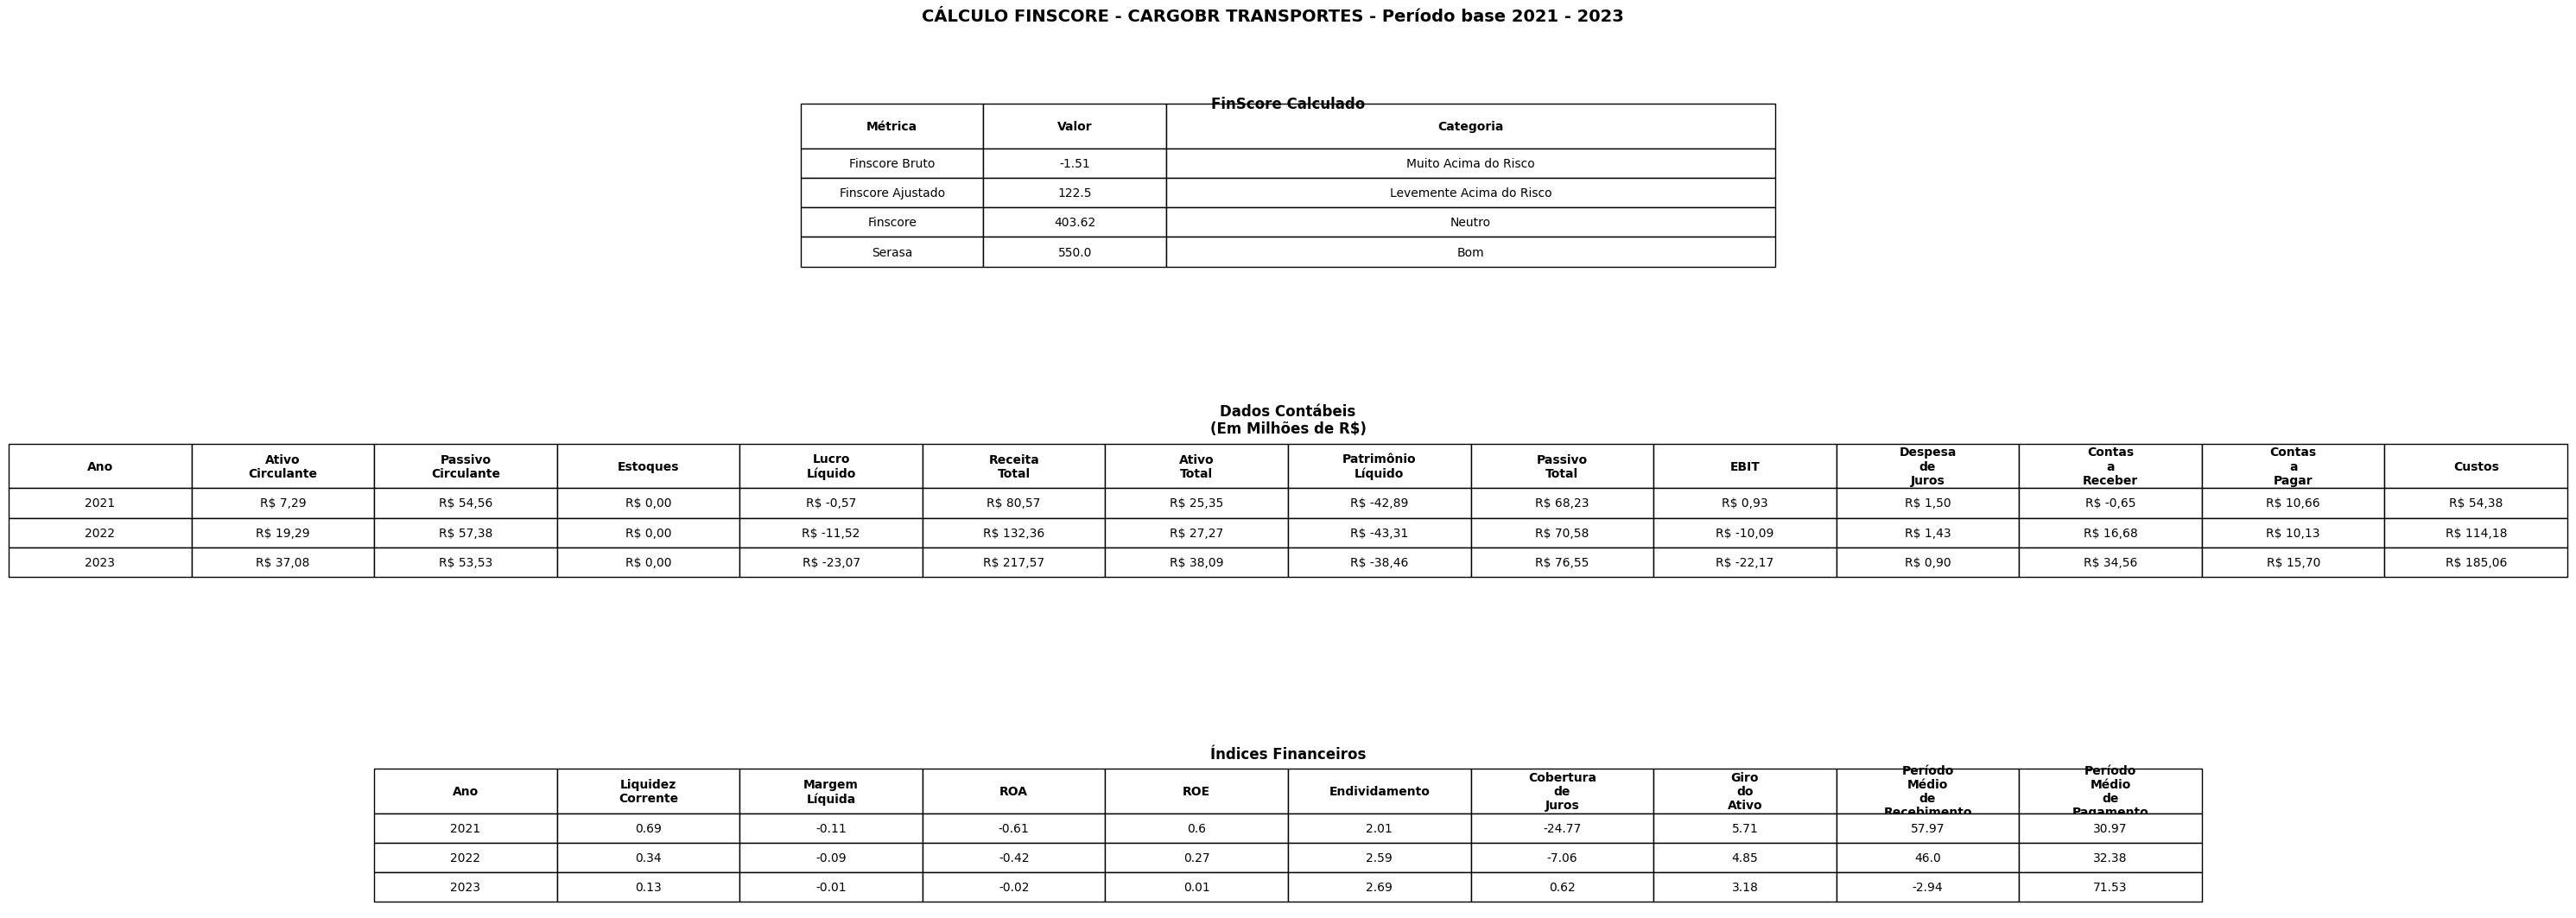

In [36]:

# --- Ajuste principal: inverter a ordem do df_indices se necess√°rio ---
df_indices = df_indices.iloc[::-1].reset_index(drop=True)

## FORMATAR PADR√ÉO BR
# C√≥pia do df original
df_dados_contabeis_milhoes = df_dados_contabeis.copy()

# Excluindo a coluna 'Ano' antes de realizar as transforma√ß√µes
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.drop(columns=['Ano'])

# Dividindo os valores das colunas num√©ricas por 1.000.000
for col in df_dados_contabeis_milhoes.select_dtypes(include=['float64', 'int64']).columns:
    df_dados_contabeis_milhoes[col] = df_dados_contabeis_milhoes[col] / 1_000_000

# Formatando os valores para o padr√£o brasileiro (R$ 1.000.000,00)
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.map(
    lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    if isinstance(x, (int, float)) else x
)

## INSERIR A COLUNA 'ANO' NAS TABELAS 'Dados Cont√°beis' e '√çndices Financeiros'
anos = list(map(str, range(ano_inicial, ano_final + 1)))  # Criando lista correta de anos

# Ajustando tamanho das listas de anos conforme o n√∫mero de linhas nos DataFrames
df_dados_contabeis_milhoes.insert(0, 'Ano', anos[:len(df_dados_contabeis_milhoes)])
df_indices.insert(0, 'Ano', anos[:len(df_indices)])

## DF RESULTADOS PRINCIPAIS
resultados_df = pd.DataFrame({
    'M√©trica': ['Finscore Bruto', 'Finscore Ajustado', 'Finscore', 'Serasa'],
    'Valor': [finscore_bruto, finscore_ajustado, finscore_final, serasa],
    'Categoria': [
        categorias_finscore_bruto([finscore_bruto])[0],
        categorias_finscore_ajustado([finscore_ajustado])[0],
        categorias_finscore_final([finscore_final])[0],
        categorias_serasa([serasa])[0]
    ]
})

## INSERINDO QUEBRA DE LINHA NOS CABE√áALHOS
df_dados_contabeis_milhoes.columns = [col.replace(' ', '\n') for col in df_dados_contabeis_milhoes.columns]
df_indices.columns = [col.replace(' ', '\n') for col in df_indices.columns]
resultados_df.columns = [col.replace(' ', '\n') for col in resultados_df.columns]

## CABE√áALHO
fig, axs = plt.subplots(nrows=3, figsize=(14, 12))

# Ajustando o espa√ßamento entre os subplots
plt.subplots_adjust(hspace=1.2)  # Aumentando a separa√ß√£o entre as tabelas

fig.suptitle(
    f'C√ÅLCULO FINSCORE - {cliente} - Per√≠odo base {ano_inicial} - {ano_final}',
    fontsize=14, fontweight='bold'
)

## TABELAS
def add_table(ax, df, title, top_padding=0.5):
    ax.axis('tight')
    ax.axis('off')

    # Ajuste din√¢mico da largura das colunas
    num_cols = len(df.columns)
    col_widths = [0.15] * num_cols  # Largura padr√£o
    if 'Categoria' in df.columns:
        col_widths[-1] = 0.5  # Maior largura para 'Categoria'

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center', loc='center',
        colWidths=col_widths
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.3, 1.3)  # Ajustando escala para melhor legibilidade
    
    # Aumentando a altura da linha do cabe√ßalho
    for col in range(len(df.columns)):
        table[(0, col)].set_height(0.3)
    
    # Destacando o cabe√ßalho com negrito
    for key, cell in table._cells.items():
        if key[0] == 0:  # Se for a primeira linha (cabe√ßalho)
            cell.set_fontsize(10)
            cell.set_text_props(weight='bold')
        else:
            cell.set_text_props(ha='center', va='center', wrap=True)  # Ajuste para quebras de linha
            cell.set_height(0.2)  # Aumentando altura para melhor ajuste de texto

    # Ajustar a posi√ß√£o do t√≠tulo para ficar mais centralizado
    ax.set_title(title, fontsize=12, fontweight='bold', pad=top_padding)
    ax.title.set_y(1.1)  # Levando o t√≠tulo um pouco para cima

# Adicionando cada tabela com ajuste fino do t√≠tulo
add_table(axs[0], resultados_df, 'FinScore Calculado', top_padding=1.0)
add_table(axs[1], df_dados_contabeis_milhoes, 'Dados Cont√°beis\n(Em Milh√µes de R$)', top_padding=1.5)
add_table(axs[2], df_indices, '√çndices Financeiros', top_padding=1.5)

plt.show()


#### 5. Prompt IA

In [37]:
print('\n========================== IN√çCIO ==========================')

print('- Gere um relat√≥rio detalhado de an√°lise de cr√©dito para o cliente abaixo, considerando sua situa√ß√£o financeira com base nos dados cont√°beis, √≠ndices financeiros e classifica√ß√£o final do FinScore.')

# **Informa√ß√µes do Cliente**
print('\n1Ô∏è‚É£ CLIENTE ANALISADO:')
print('--------------------------------------')
print(f'Nome: {cliente}')
print(f'Per√≠odo da An√°lise: {ano_inicial} - {ano_final}')

# **Descri√ß√£o Conceitual**
print('\n2Ô∏è‚É£ CONTEXTUALIZA√á√ÉO:')
print('--------------------------------------')
print('O relat√≥rio deve iniciar explicando o conceito do **FinScore**, um √≠ndice consolidado que sintetiza a **capacidade de pagamento, liquidez e resultados operacionais** da empresa.')
print('O FinScore √© calculado a partir de demonstra√ß√µes financeiras, √≠ndices cont√°beis e an√°lise multivariada para fornecer uma **vis√£o clara do risco financeiro** da empresa.')
print('O objetivo final √© avaliar a **solidez financeira** da empresa e sua **capacidade de honrar compromissos financeiros**.')

# **Escalas de Classifica√ß√£o**
print('\n3Ô∏è‚É£ ESCALAS DE CLASSIFICA√á√ÉO DO FINSCORE:')
print('--------------------------------------')

# **Finscore Bruto**
print('\nüìå **Finscore Bruto:**')
print('Mede a posi√ß√£o relativa da empresa no conjunto analisado, refletindo sua liquidez e estrutura financeira.')
print(f'üîç **FinScore Bruto:** {finscore_bruto} | **Categoria:** {categorias_finscore_bruto}')

# **Finscore Ajustado**
print('\nüìå **Finscore Ajustado:**')
print('Vers√£o ajustada do FinScore Bruto, considerando o contexto setorial e ajustando distor√ß√µes estat√≠sticas.')
print(f'üîç **FinScore Ajustado:** {finscore_ajustado} | **Categoria:** {categorias_finscore_ajustado}')

# **Finscore Final**
print('\nüìå **Finscore Final:**')
print('Indicador consolidado, refletindo a **sa√∫de financeira geral** da empresa.')
print(f'üîç **FinScore Final:** {finscore_final} | **Categoria:** {categorias_finscore_final}')

# **Serasa Score**
print('\nüìå **Serasa Score:**')
print('O Serasa Score √© um indicador utilizado para avaliar o risco de inadimpl√™ncia com base no hist√≥rico financeiro do cliente.')
print(f'üîç **Serasa Score:** {serasa} | **Categoria:** {categorias_serasa}')

# **Compara√ß√£o entre os Scores**
print('\nüìä **Compara√ß√£o entre os tr√™s FinScores e o Serasa Score:**')
print('Analise se h√° coer√™ncia entre os diferentes scores. Caso o FinScore indique um risco alto e o Serasa um score positivo, justifique a diverg√™ncia.')
print('Considere fatores como:')
print('- Volume de endividamento recente.')
print('- Hist√≥rico de cr√©dito da empresa.')
print('- Setor de atua√ß√£o e sazonalidade.')

# **Dados Cont√°beis**
print('\n4Ô∏è‚É£ DADOS CONT√ÅBEIS:')
print('--------------------------------------')
print('Os seguintes dados foram extra√≠dos das demonstra√ß√µes financeiras da empresa. Para cada um, explique seu significado e impacto na an√°lise de cr√©dito.')
print(df_dados_contabeis)

# **√çndices Cont√°beis**
print('\n5Ô∏è‚É£ √çNDICES FINANCEIROS:')
print('--------------------------------------')
print('Os √≠ndices abaixo avaliam **liquidez, rentabilidade e estrutura de capital** da empresa. Explique o significado de cada um e como afetam a an√°lise de cr√©dito.')
print(df_indices)

# **An√°lise da Situa√ß√£o da Empresa**
print('\n6Ô∏è‚É£ INTERPRETA√á√ÉO DOS RESULTADOS:')
print('--------------------------------------')
print('Analise os √≠ndices e explique:')
print('- A **capacidade de pagamento da empresa** com base nos √≠ndices de liquidez.')
print('- A **rentabilidade**, considerando os indicadores de margem l√≠quida, ROA e ROE.')
print('- O n√≠vel de **endividamento** e sua rela√ß√£o com o capital pr√≥prio.')
print('- Se h√° sinais de **desequil√≠brio financeiro** ou indicadores de solv√™ncia positiva.')

# **Resultado do PCA**
print('\n7Ô∏è‚É£ RESULTADOS DA AN√ÅLISE MULTIVARIADA (PCA):')
print('--------------------------------------')
print('Os c√°lculos do PCA foram utilizados para consolidar os √≠ndices financeiros e gerar uma **avalia√ß√£o agregada do risco**.')
print('Evite termos t√©cnicos e foque na interpreta√ß√£o dos componentes principais.')

# **Veredicto Final**
print('\n8Ô∏è‚É£ VEREDICTO FINAL:')
print('--------------------------------------')
print('O **FinScore Final** recebe um peso maior na decis√£o, mas deve ser avaliado junto ao Finscore Bruto, Ajustado e Serasa Score.')
print('\nüìå **Resumo da An√°lise:**')
print(f'- **Finscore Bruto:** {finscore_bruto} | **Categoria:** {categorias_finscore_bruto}')
print(f'- **Finscore Ajustado:** {finscore_ajustado} | **Categoria:** {categorias_finscore_ajustado}')
print(f'- **Finscore Final:** {finscore_final} | **Categoria:** {categorias_finscore_final}')
print(f'- **Serasa Score:** {serasa} | **Categoria:** {categorias_serasa}')

print('\nüìå **Decis√£o Final:**')
if finscore_final <= 100:
    print('üõë **ALTO RISCO:** A empresa apresenta um risco significativo e pode n√£o ser recomendada para concess√£o de cr√©dito sem garantias adicionais.')
elif 100 < finscore_final <= 250:
    print('‚ö†Ô∏è **RISCO MODERADO:** Recomenda-se cautela e monitoramento peri√≥dico.')
elif 250 < finscore_final <= 500:
    print('‚úÖ **RISCO CONTROLADO:** Empresa relativamente est√°vel, mas requer avalia√ß√£o cont√≠nua.')
else:
    print('üü¢ **BAIXO RISCO:** Empresa com boa sa√∫de financeira e baixo risco de inadimpl√™ncia.')

# **Conclus√£o**
print('\n9Ô∏è‚É£ CONCLUS√ÉO:')
print('--------------------------------------')
print('Finalizando, apresente uma conclus√£o sobre a empresa:')
print('- **Se o cliente representa um risco ou uma oportunidade de cr√©dito.**')
print('- **Se a empresa est√° financeiramente saud√°vel ou requer monitoramento.**')
print('- **Recomenda√ß√µes de mitiga√ß√£o de riscos (ex: garantias, limites de cr√©dito, acompanhamento peri√≥dico).**')

print('\n========================== FIM ==========================')



========================== IN√çCIO ==========================
- Gere um relat√≥rio detalhado de an√°lise de cr√©dito para o cliente abaixo, considerando sua situa√ß√£o financeira com base nos dados cont√°beis, √≠ndices financeiros e classifica√ß√£o final do FinScore.

1Ô∏è‚É£ CLIENTE ANALISADO:
--------------------------------------
Nome: CARGOBR TRANSPORTES
Per√≠odo da An√°lise: 2021 - 2023

2Ô∏è‚É£ CONTEXTUALIZA√á√ÉO:
--------------------------------------
O relat√≥rio deve iniciar explicando o conceito do **FinScore**, um √≠ndice consolidado que sintetiza a **capacidade de pagamento, liquidez e resultados operacionais** da empresa.
O FinScore √© calculado a partir de demonstra√ß√µes financeiras, √≠ndices cont√°beis e an√°lise multivariada para fornecer uma **vis√£o clara do risco financeiro** da empresa.
O objetivo final √© avaliar a **solidez financeira** da empresa e sua **capacidade de honrar compromissos financeiros**.

3Ô∏è‚É£ ESCALAS DE CLASSIFICA√á√ÉO DO FINSCORE:
----------